本專案為一個Airbnb的資料科學專案，商業目標是：

如果用戶現在要訂房，推播最有可能、對他們最合適的前五名airbnb民宿到他們的手機。


資料網址：https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings

In [169]:
import pandas as pd
import numpy as np

In [170]:
#讀入資料
train_data = pd.read_csv('C:/Users/USER/Desktop/Github/Python Project/train_users_2.csv')
test_data = pd.read_csv('C:/Users/USER/Desktop/Github/Python Project/test_users.csv')

#合併資料集
df = pd.concat([train_data , test_data] , axis = 0 , ignore_index=True, sort = False)
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [171]:
df.shape

(275547, 16)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
id                         275547 non-null object
date_account_created       275547 non-null object
timestamp_first_active     275547 non-null int64
date_first_booking         88908 non-null object
gender                     275547 non-null object
age                        158681 non-null float64
signup_method              275547 non-null object
signup_flow                275547 non-null int64
language                   275547 non-null object
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
first_affiliate_tracked    269462 non-null object
signup_app                 275547 non-null object
first_device_type          275547 non-null object
first_browser              275547 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 33.6+ MB


In [72]:
#資料全覽:

def overview_data(df):
    
    print('資料全覽')
    df.info()
    print('---------------------------------')
    print('rows(資料筆數): ',df.shape[0])
    
    print('---------------------------------')
    print('features(特徵數):  ' , df.shape[1])
    
    print('---------------------------------')
    print('Number of missing value(遺失值) :')
    
    print('---------------------------------')
    print('遺失值總數:', df.isnull().sum().values.sum())
    
    print('---------------------------------')
    print('每欄位有多少種值:')
    print('---------------------------------')
    print(df.nunique())

    
overview_data(df)


資料全覽
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
id                         275547 non-null object
date_account_created       275547 non-null object
timestamp_first_active     275547 non-null int64
date_first_booking         88908 non-null object
gender                     275547 non-null object
age                        158681 non-null float64
signup_method              275547 non-null object
signup_flow                275547 non-null int64
language                   275547 non-null object
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
first_affiliate_tracked    269462 non-null object
signup_app                 275547 non-null object
first_device_type          275547 non-null object
first_browser              275547 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 33.6+ MB
----------------------

1.age有很多缺失值，另外有145個不同的值顯然不合理
2.gender有四種也蠻奇怪的 
3.資料總共27萬筆左右
4.date_first_booking也少太多......原來test_data都沒存這項資料！
這麼懸殊的資料差可能就必須考慮把這一欄刪除

In [73]:
train_data['date_first_booking']

0                NaN
1                NaN
2         2010-08-02
3         2012-09-08
4         2010-02-18
             ...    
213446           NaN
213447           NaN
213448           NaN
213449           NaN
213450           NaN
Name: date_first_booking, Length: 213451, dtype: object

In [74]:
test_data['date_first_booking']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
62091   NaN
62092   NaN
62093   NaN
62094   NaN
62095   NaN
Name: date_first_booking, Length: 62096, dtype: float64

In [261]:
sessions_data = pd.read_csv('C:/Users/USER/Desktop/Github/Python Project/sessions.csv')
sessions_data.info()

MemoryError: 

In [124]:
sessions_data.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [77]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


session data 的6個feature:

1.user_id: to be joined with the column ‘id’ in users table

2.action

3.action_type

4.action_detail

5.device_type

6.secs_elapsed



df的16個feature:

1.id

2.date_account_created: 
the date of account creation

3.timestamp_first_active: 
timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up

4.date_first_booking: 
date of first booking

5.gender

6.age

7.signup_method

8.signup_flow: 
the page a user came to signup up from

9.language: 
international language preference

10.affiliate_channel:
what kind of paid marketing

11.affiliate_provider: 
where the marketing is e.g. google, craigslist, other

12.first_affiliate_tracked: 
whats the first marketing the user interacted with before the signing up

13.signup_app

14.first_device_type

15.first_browser

16.country_destination: 
this is the target variable we are to predict

Data Wrangling:



In [174]:
#開始作業前先來備份
df_backup = df
sessions_data_backup = sessions_data

In [175]:
print(df.gender.unique())

['-unknown-' 'MALE' 'FEMALE' 'OTHER']


In [176]:
df.isnull().any()

id                         False
date_account_created       False
timestamp_first_active     False
date_first_booking          True
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
country_destination         True
dtype: bool

In [177]:
#Missing Data:

df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         186639
gender                          0
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser                   0
country_destination         62096
dtype: int64

In [178]:
#時間格式轉換
df.date_account_created = pd.to_datetime(df.date_account_created)
df.date_first_booking = pd.to_datetime(df.date_first_booking)

In [179]:
#把date_first_booking欄位非空值的row的date_first_booking欄位都印出來
day1 = (df[df.date_first_booking.notna()]).date_first_booking
day1

2        2010-08-02
3        2012-09-08
4        2010-02-18
5        2010-01-02
6        2010-01-05
            ...    
213415   2014-06-30
213439   2015-03-16
213441   2014-08-13
213443   2014-07-13
213445   2014-07-02
Name: date_first_booking, Length: 88908, dtype: datetime64[ns]

In [180]:
#把date_first_booking欄位非空值的row的date_account_created欄位都印出來
day2 = df[df.date_first_booking.notna()].date_account_created
day2

2        2010-09-28
3        2011-12-05
4        2010-09-14
5        2010-01-01
6        2010-01-02
            ...    
213415   2014-06-30
213439   2014-06-30
213441   2014-06-30
213443   2014-06-30
213445   2014-06-30
Name: date_account_created, Length: 88908, dtype: datetime64[ns]

In [181]:
#創立帳號的時間必定早於第一次訂房的時間
day_gap = day1-day2
day_gap

2         -57 days
3         278 days
4        -208 days
5           1 days
6           3 days
            ...   
213415      0 days
213439    259 days
213441     44 days
213443     13 days
213445      2 days
Length: 88908, dtype: timedelta64[ns]

In [182]:
day_gap.describe()

count                      88908
mean     44 days 08:41:59.854231
std      87 days 11:59:22.090141
min          -349 days +00:00:00
25%              1 days 00:00:00
50%              3 days 00:00:00
75%             29 days 00:00:00
max            365 days 00:00:00
dtype: object

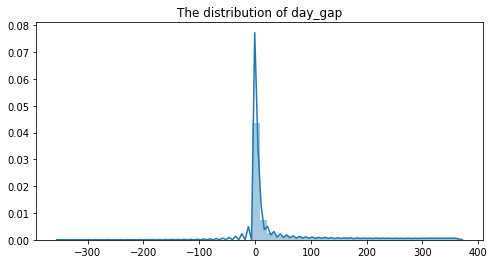

In [183]:
day_collect = []
for d in day_gap:
    day_collect.append(int(d.days)) #把Series中每一項timedelta64[ns]轉為int
    
    
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize= (8,4))
plt.title('The distribution of day_gap')
sns.distplot(day_collect)

有些極端值是創了很久帳戶之後才用，但大部分的人都是沒創多久就使用airbnb了；呈現峰度非常高的類似常態分佈

就統計的定義上，高峰度就代表著：資料群的變異主要是來自極端事件影響很大

這裡有兩種可能的做法:

1.)
移除掉400天等太極端的數值，然後利用剩下的資料來預測first booking的日期

2.)
直接把date_first_booking欄位刪除，因為不能確認這個feature有沒有用，加上就目前這樣觀察days而言，first booking跟first account可能會有蠻強的共線性


In [184]:
#按照分析把unknown都改成NaN
df.gender.replace('-unknown-' , np.nan , inplace=True)
df.first_browser.replace('-unknown-' , np.nan , inplace=True)

#把date_first_booking直接刪掉
df.drop('date_first_booking' , axis = 1 , inplace = True)

#再看看目前遺失值的情況:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
gender                     129480
age                        116866
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6085
signup_app                      0
first_device_type               0
first_browser               44394
country_destination         62096
dtype: int64

In [185]:
df_backup1 = df

接下來就是填補值了:



In [186]:
#首先是Age
df.age.describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

In [187]:
df[df.age>1000]['age'].describe() 
#把超過一千歲的傻瓜找出來 
#看一下最大值，好像有人搞錯成註冊年份了

count     828.000000
mean     2007.117150
std        22.219408
min      1920.000000
25%      2014.000000
50%      2014.000000
75%      2014.000000
max      2014.000000
Name: age, dtype: float64

In [188]:
df[df.age<18]['age'].describe() #小於18歲?

count    188.000000
mean      12.718085
std        5.764569
min        1.000000
25%        5.000000
50%       16.000000
75%       17.000000
max       17.000000
Name: age, dtype: float64

In [189]:
#由於這份資料是2015年的data，用2015處理寫成註冊年份的人
df[df.age>1000]['age']  = 2015 - df[df.age>1000]['age']

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [190]:
#超過95歲的、不到16歲的
#要用loc[filter ,  col_name]的寫法才可以讓Python知道要替換
df.loc[df.age>95 , 'age'] = np.nan
df.loc[df.age < 16 , 'age'] = np.nan

In [191]:
df['age'].describe() #比較正常了

count    155816.000000
mean         36.013631
std          11.552798
min          16.000000
25%          28.000000
50%          33.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

Start EDA!!


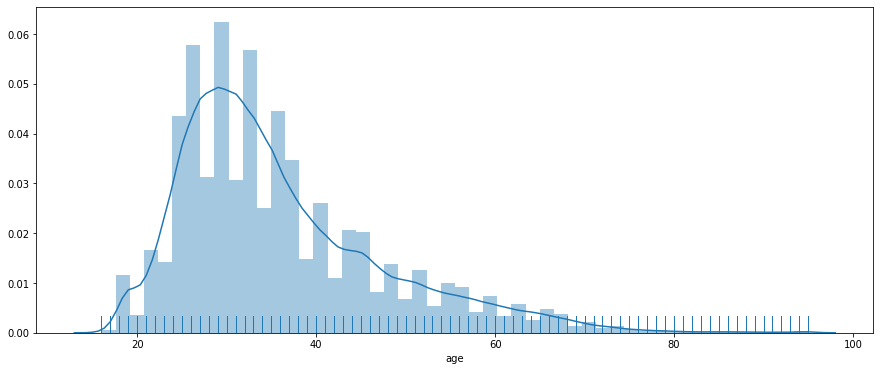

In [192]:
plt.figure(figsize=(15,6))
sns.distplot(df.age.dropna(), rug = True)


#移除框線
#sns.despine()


可看出主要客群在20~40歲之間

In [98]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\USER\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [99]:
import plotly.offline as py
import plotly.graph_objs as go

In [100]:
py.init_notebook_mode(connected=True)

In [193]:
df.groupby(df.country_destination).agg('count').id.keys()

Index(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NDF', 'NL', 'PT', 'US',
       'other'],
      dtype='object', name='country_destination')

In [194]:
df.groupby(df.country_destination).agg('count').id.values

array([   539,   1428,   1061,   2249,   5023,   2324,   2835, 124543,
          762,    217,  62376,  10094], dtype=int64)

In [195]:
#按照目的地國家分類

labels = df.groupby(df.country_destination).agg('count').id.keys().tolist()

values = df.groupby(df.country_destination).agg('count').id.values.tolist()

trace = go.Pie(labels=labels, values=values)

py.iplot([trace])

基本上有60%的人都沒有訂過房，如果有，基本上也都是訂位於US的國家。

由於這是美國的資料，看來大部分人使用Airbnb還是以國內旅遊為主。

In [196]:
#年齡跟去的國家有關嗎？比如年輕人會不會更喜愛往外跑一點？

df_without_NDF = df[df.country_destination != 'NDF']


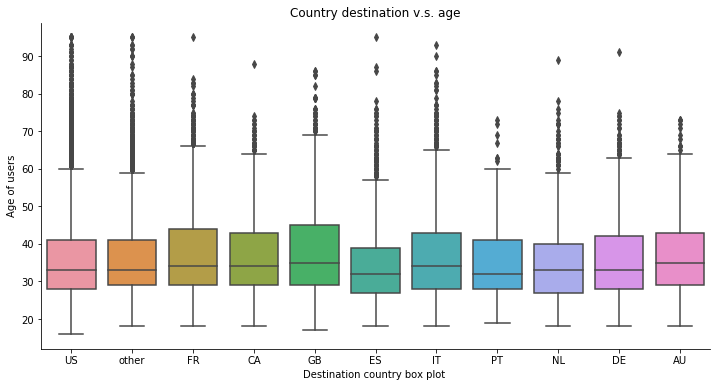

In [197]:
plt.figure(figsize =(12 , 6))

sns.boxplot(x = 'country_destination' , y = 'age' , data = df_without_NDF)

plt.xlabel('Destination country box plot ')
plt.ylabel('Age of users')
plt.title('Country destination v.s. age')
sns.despine()

基本上各個年齡層對旅遊國家沒有太特別的偏好

註冊資料分析:


In [198]:
#把圓餅圖套裝起來:

def call_pie(col_name):
    
    labels = df.groupby(df[col_name]).agg('count').id.keys().tolist()
    
    values = df.groupby(df[col_name]).agg('count').id.values.tolist()
    
    trace = go.Pie(labels=labels, values=values)


    py.iplot([trace])

In [199]:
call_pie('signup_method')

基本上很大的比例都是使用郵件註冊(basic)的方式登入

In [200]:
call_pie('signup_app')

1.很多人都是瀏覽器搜尋過來的(近8成)

2.ios用戶使用的人比android的還多

In [201]:
call_pie('affiliate_provider')

伴隨其他服務的使用者以Google最多(23.9%)，但是有65.8%的比例是直接使用的。

時間序列分析:


In [202]:
df_without_NDF

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,cv0na2lf5a,2014-09-30,20140930235232,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
275543,zp8xfonng8,2014-09-30,20140930235306,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,NaN,NaN
275544,fa6260ziny,2014-09-30,20140930235408,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN
275545,87k0fy4ugm,2014-09-30,20140930235430,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NaN


時間格式轉換

In [203]:
df_without_NDF['date_account_created'] = pd.to_datetime(df_without_NDF.date_account_created)


C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [204]:
x = df_without_NDF.timestamp_first_active//1000000
x

2         20090609
3         20091031
4         20091208
5         20100101
6         20100102
            ...   
275542    20140930
275543    20140930
275544    20140930
275545    20140930
275546    20140930
Name: timestamp_first_active, Length: 151004, dtype: int64

In [205]:
#年月日抽出來就好
df_without_NDF.timestamp_first_active = pd.to_datetime(df_without_NDF.timestamp_first_active//1000000 , format='%Y%m%d')

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [206]:
df_without_NDF

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,2009-06-09,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01,NaN,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,cv0na2lf5a,2014-09-30,2014-09-30,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
275543,zp8xfonng8,2014-09-30,2014-09-30,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,NaN,NaN
275544,fa6260ziny,2014-09-30,2014-09-30,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN
275545,87k0fy4ugm,2014-09-30,2014-09-30,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NaN


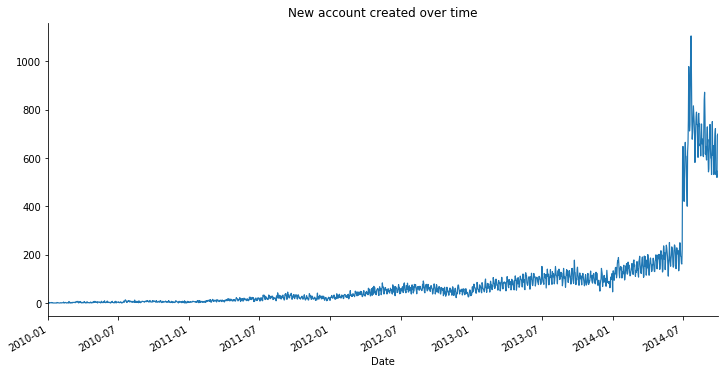

In [207]:
#做時間序列的圖

plt.figure(figsize=(12 , 6))

#折線圖
df_without_NDF.date_account_created.value_counts().plot(kind = 'line' ,
                                                        linewidth = 1.2 )

plt.xlabel('Date')
plt.title('New account created over time')

sns.despine()

2014年包含確定了Airbnb總部以及其他營運事項，我們可以看到2014年之後的Airbnb真的是急速成長。

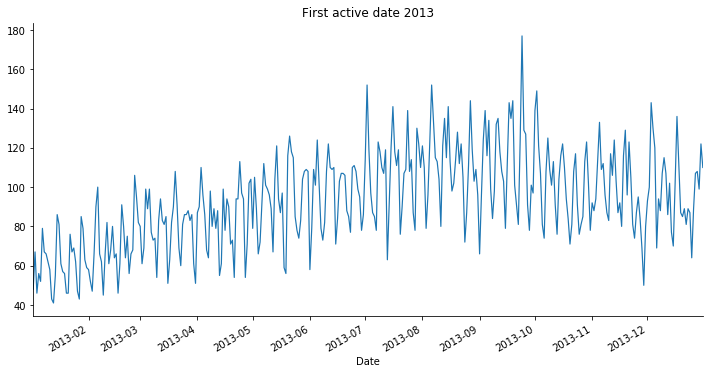

In [208]:
#2014年以前又是什麼樣子呢？

#先切出20130101~20140101的時間
df_2013 = df_without_NDF[df_without_NDF.timestamp_first_active > pd.to_datetime(20130101 , format = '%Y%m%d')]
df_2013 = df_2013[df_2013.timestamp_first_active < pd.to_datetime(20140101 , format = '%Y%m%d')]

plt.figure(figsize = (12,6))
plt.title('First active date 2013')
plt.xlabel('Date')

df_2013.timestamp_first_active.value_counts().plot(kind = 'line' ,
                                                   linewidth = 1.2)

sns.despine()


分析網站本身儲存的資料(sessions)~

In [210]:
sessions_data_backup = sessions_data
sessions_data

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,-unknown-,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,-unknown-,-unknown-,-unknown-,17624.0


In [211]:
sessions_data.head(10)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
5,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,7703.0
6,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,115.0
7,d1mm9tcy42,personalize,data,wishlist_content_update,Windows Desktop,831.0
8,d1mm9tcy42,index,view,view_search_results,Windows Desktop,20842.0
9,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,683.0


In [212]:
sessions_data.action_type.describe()

count     9441533
unique         10
top          view
freq      3560902
Name: action_type, dtype: object

In [213]:
sessions_data.action_type.replace('-unknown-' , np.nan , inplace=True)

sessions_data.action_type.value_counts()


view                3560902
data                2103770
click               1996183
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

In [214]:
"""
功能：產生餅圖
df: 使用哪一個dataframe
col_name :輸入欄位的名字 , 可指定該series
name:可決定圓餅圖的圖表名稱
"""


def session_pie(df , col_name , name):
    fig = {
      "data": [
        {
          "values": df[col_name].value_counts().tolist(),
          "labels": df[col_name].value_counts().keys().tolist(),
          "domain": {"column": 0},
          "name": name,
          "hoverinfo":"label+percent+name",
          "hole": .4,
          "type": "pie"
        }
        ],
      "layout": {
            "title":name + '   ' +'distribution',
            #"grid": {"rows": 1, "columns": 2},
            "annotations": [
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "GHG",
                    "x": 0.20,
                    "y": 0.5
                }
            ]
        }
    }
    
    py.iplot(fig)


In [215]:
session_pie(sessions_data , 'action_type' , name = 'interaction')

In [216]:
session_pie(sessions_data , 'device_type' , name = 'devices')

資料處理 >> df的部分:


In [218]:
df_backup2 = df
df

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275542,cv0na2lf5a,2014-09-30,20140930235232,NaN,31.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,IE,NaN
275543,zp8xfonng8,2014-09-30,20140930235306,NaN,NaN,basic,23,ko,direct,direct,untracked,Android,Android Phone,NaN,NaN
275544,fa6260ziny,2014-09-30,20140930235408,NaN,NaN,basic,0,de,direct,direct,linked,Web,Windows Desktop,Firefox,NaN
275545,87k0fy4ugm,2014-09-30,20140930235430,NaN,NaN,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NaN


In [219]:
df.date_account_created = pd.to_datetime(df.date_account_created)
df.timestamp_first_active = pd.to_datetime( (df.timestamp_first_active//1000000) , format = '%Y%m%d')


In [220]:
#拆分成年月週日 #合成新的feature
df['weekday_account_created'] = df.date_account_created.dt.weekday_name
df['day_account_created'] = df.date_account_created.dt.day
df['month_account_created'] = df.date_account_created.dt.month
df['year_account_created'] = df.date_account_created.dt.year

df['weekday_first_active'] = df.timestamp_first_active.dt.weekday_name
df['day_first_active'] = df.timestamp_first_active.dt.day
df['month_first_active'] = df.timestamp_first_active.dt.month
df['year_first_active'] = df.timestamp_first_active.dt.year


In [223]:
df_backup3 = df
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_browser,country_destination,weekday_account_created,day_account_created,month_account_created,year_account_created,weekday_first_active,day_first_active,month_first_active,year_first_active
0,gxn3p5htnn,2010-06-28,2009-03-19,NaN,NaN,facebook,0,en,direct,direct,...,Chrome,NDF,Monday,28,6,2010,Thursday,19,3,2009
1,820tgsjxq7,2011-05-25,2009-05-23,MALE,38.0,facebook,0,en,seo,google,...,Chrome,NDF,Wednesday,25,5,2011,Saturday,23,5,2009
2,4ft3gnwmtx,2010-09-28,2009-06-09,FEMALE,56.0,basic,3,en,direct,direct,...,IE,US,Tuesday,28,9,2010,Tuesday,9,6,2009
3,bjjt8pjhuk,2011-12-05,2009-10-31,FEMALE,42.0,facebook,0,en,direct,direct,...,Firefox,other,Monday,5,12,2011,Saturday,31,10,2009
4,87mebub9p4,2010-09-14,2009-12-08,NaN,41.0,basic,0,en,direct,direct,...,Chrome,US,Tuesday,14,9,2010,Tuesday,8,12,2009


In [224]:
df['time_lag'] = (df['date_account_created'] - df.timestamp_first_active)
df['time_lag']

0        466 days
1        732 days
2        476 days
3        765 days
4        280 days
           ...   
275542     0 days
275543     0 days
275544     0 days
275545     0 days
275546     0 days
Name: time_lag, Length: 275547, dtype: timedelta64[ns]

In [ ]:
#df['time_lag'] = df['time_lag'].astype(pd.Timedelta).apply(lambda l : l.days)
#df['time_lag']

In [225]:
#移除掉原本的時間特徵
cols_to_drop = ['date_account_created', 'timestamp_first_active']
df.drop(cols_to_drop , axis = 1 , inplace=True)

In [226]:
df.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,...,country_destination,weekday_account_created,day_account_created,month_account_created,year_account_created,weekday_first_active,day_first_active,month_first_active,year_first_active,time_lag
0,gxn3p5htnn,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,...,NDF,Monday,28,6,2010,Thursday,19,3,2009,466 days
1,820tgsjxq7,MALE,38.0,facebook,0,en,seo,google,untracked,Web,...,NDF,Wednesday,25,5,2011,Saturday,23,5,2009,732 days
2,4ft3gnwmtx,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,...,US,Tuesday,28,9,2010,Tuesday,9,6,2009,476 days
3,bjjt8pjhuk,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,...,other,Monday,5,12,2011,Saturday,31,10,2009,765 days
4,87mebub9p4,NaN,41.0,basic,0,en,direct,direct,untracked,Web,...,US,Tuesday,14,9,2010,Tuesday,8,12,2009,280 days


In [227]:
#先前EDA時做過的篩選處理
df_with_year = df['age'] > 1000
df.loc[df_with_year , 'age'] = 2015 - df.loc[df_with_year , 'age']
df.loc[df.age > 95 , 'age'] = np.nan
df.loc[df.age < 16 , 'age'] = np.nan
df.age.fillna(-1 , inplace=True)

In [231]:
df_backup4 = df

資料處理 >> ssesions_data的部分:

In [258]:
sessions_data

,id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0
...,...,...,...,...,...,...
10567732,9uqfg8txu3,dashboard,view,dashboard,Windows Desktop,556.0
10567733,9uqfg8txu3,edit,view,edit_profile,Windows Desktop,6624.0
10567734,9uqfg8txu3,webcam_upload,NaN,-unknown-,Windows Desktop,200125.0
10567735,9uqfg8txu3,active,NaN,-unknown-,-unknown-,17624.0


In [259]:
sessions = sessions_data.copy()

In [260]:
sessions.rename(columns={'user_id':'id'} , inplace=True)
sessions.head()

MemoryError: 

我們使用secs_elapsed這個指標做統計，並且分箱，倘若：
小於3600 -> short_pause
大於86400 -> day_pause
大於300,000 -> long_pause

In [ ]:
secs_epapsed = sessions.groupby('id')['secs_elapsed']
secs_epapsed = secs_epapsed.agg({
      'secs_elapsed_sum': np.sum,
        'secs_elapsed_mean': np.mean,
        'secs_elapsed_min': np.min,
        'secs_elapsed_max': np.max,
        'secs_elapsed_median': np.median,
        'secs_elapsed_std': np.std,
        'secs_elapsed_var': np.var,
    'day_pause':lambda x:(x > 86400).sum(),
    'long_pause':lambda x:(x>300000).sum(),
    'short_pause':lambda x:(x < 3600).sum(),
    'session_length':np.count_nonzero
})
secs_epapsed.reset_index(inplace = True)
sessions_secs_elapsed = pd.merge(sessions_data , secs_epapsed , on ='id' , how = 'left')
df = pd.merge(df , sessions_secs_elapsed , on = 'id' , how = 'left')

df的資料編碼:


In [ ]:
cate_features = ['gender', 'signup_method', 'signup_flow', 'language','affiliate_channel',
                 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 
                 'most_used_device', 'weekday_account_created', 'weekday_first_active']

df = pd.get_dummies(df , columns=cate_features)

用NBCG演算法(Normalized Discounted Cumulative Gain)來排序

實務上很常用到，也是一個很有名評估網站搜索結果的演算法。

參考論文：
1. http://proceedings.mlr.press/v30/Wang13.pdf
2. http://hal.in2p3.fr/file/index/docid/726760/filename/07-busa-fekete.pdf

In [ ]:
def ndcg_score(preds , dtrain):
    labels = dtrain.get_label()
    top = []
    
    for i in range(preds.shape[0]):
        top.append(np.argsort(preds[i])[::-1][:5])
        
    mat = np.reshape(np.repeat(labels , np.shape(top)[1]) == np.array(top).ravel() , np.array(top).shape).astype(int)
    score = np.mean(np.sum(mat/np.log2(np.arange(2, mat.shape[1] + 2)),axis = 1))
    return 'ndcg', score

XGBoost有一套處理NaN的方式，本質上就是乾脆把缺失值當作一類來處理，所以我們都把nan統一用-1來表示。

In [ ]:
train_df = df.loc[train_users['id']]
train_df.reset_index(inplace = True)
train_df.fillna(-1 , inplace = True)
#將target抽出來
y_train = train_df['country_destination']
train_df.drop(['country_destination' , 'id'] , axis = 1 , inplace = True)
#將剩下的dataframe轉為矩陣，才能夠放入sklearn裡面
x_train = train_df.values
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
#將我們的target使用label編碼，畢竟US的特別多，希望他有先後順序的關係，然後target不可能做one hot，畢竟只有一個維度
label_encoder = LabelEncoder()
encoded_y_train = label_encoder.fit_transform(y_train)
xgtrain = xgb.DMatrix(x_train, label=encoded_y_train)
#設置超參數
param = {
    'max_depth': 10,
    'learning_rate': 1,
    'n_estimators': 5,
    'objective': 'multi:softprob',
    'num_class': 12,
    'gamma': 0,
    'min_child_weight': 1,
    'max_delta_step': 0,
    'subsample': 1,
    'colsample_bytree': 1,
    'colsample_bylevel': 1,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'scale_pos_weight': 1,
    'base_score': 0.5,
    'missing': None,
    'silent': True,
    'nthread': 4,
    'seed': 42
}
#trian 我們的model 做交叉驗證 (cross validation)
num_round = 5
#train 我們的model，並使用剛剛寫好的function
xgb.cv(param , xgtrain , num_boost_round = num_round , metrics = ['mlogloss'] , feval=ndcg_score)